# causaldata Package Demo

**Author:** Dili Maduabum  
**Date:** December 2025  
**Package:** causaldata v0.1.0

This notebook demonstrates the main features of the `causaldata` package for simulating correlated mixed-type data.

In [11]:
# Setup - import the package
import sys
sys.path.insert(0, '..')  # Add parent directory for local import

from causaldata import MixedSimulator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set_style('whitegrid')
print("Setup complete!")

Setup complete!


## Example 1: Basic Usage

Generate correlated data with mixed types: continuous income, binary treatment, and ordinal education.

In [2]:
# Create simulator
sim = MixedSimulator(n=1000)

# Add variables
sim.add_continuous("income", mean=50000, std=15000, min_val=0)
sim.add_binary("treated", prob=0.3)
sim.add_ordinal("education", 
                levels=["HS", "College", "Grad"],
                probs=[0.3, 0.5, 0.2])

# Set correlations
sim.set_correlation("income", "education", 0.5)
sim.set_correlation("treated", "education", 0.2)

# Generate data
data = sim.generate(seed=42)

# Display results
print(f"Generated {len(data)} observations\n")
display(data.head(10))
display(data.describe())

Generated 1000 observations



,income,treated,education
0,38829.288670,0,College
1,31657.919437,0,HS
2,38125.748812,1,HS
3,43906.646217,0,HS
4,47925.461323,0,HS
5,49123.767685,0,College
6,43418.718841,0,Grad
7,62665.627466,0,College
8,64967.777486,0,College
9,44016.150889,0,College


,income,treated
count,1000.000000,1000.000000
mean,49001.728722,0.303000
std,14592.834400,0.459785
min,0.000000,0.000000
25%,39054.150290,0.000000
50%,49107.337408,0.000000
75%,59123.251802,1.000000
max,97946.052701,1.000000


## Example 2: Visualize Income by Education

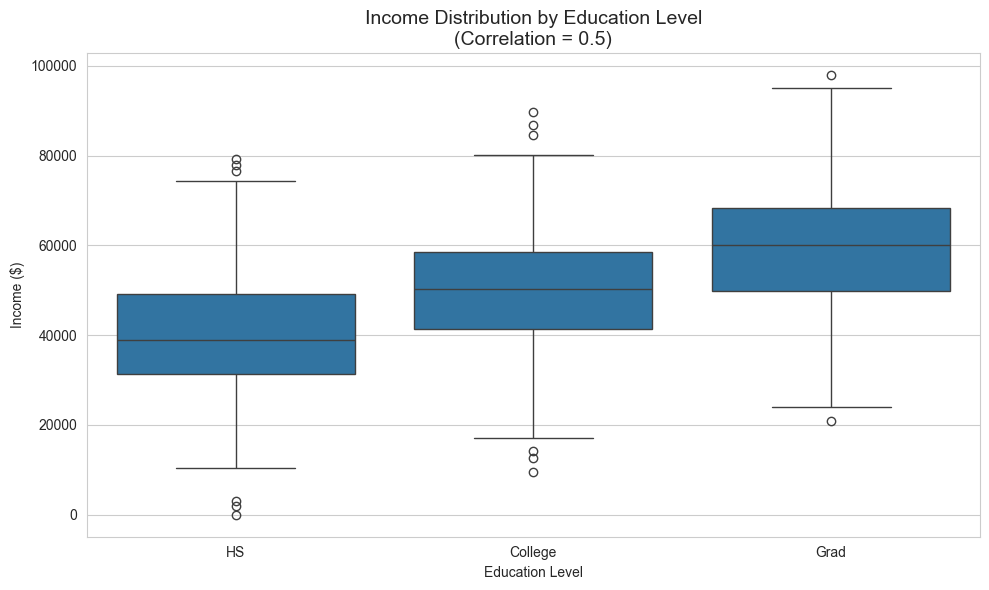


Mean income by education level:
education
Grad       60000.434543
College    49937.094829
HS         40517.137466
Name: income, dtype: float64


In [3]:
# Box plot: Income by Education Level
plt.figure(figsize=(10, 6))
order = ["HS", "College", "Grad"]
sns.boxplot(data=data, x="education", y="income", order=order)
plt.title("Income Distribution by Education Level\n(Correlation = 0.5)", fontsize=14)
plt.ylabel("Income ($)")
plt.xlabel("Education Level")
plt.tight_layout()
plt.show()

# Summary by group
print("\nMean income by education level:")
print(data.groupby("education")["income"].mean().sort_values(ascending=False))

## Example 3: Correlation Preservation

Verify that specified correlations are preserved in the generated data.

Specified correlations:
  x1 ↔ x2:  0.7
  x1 ↔ x3: -0.4
  x2 ↔ x3:  0.3

Observed correlations:
       x1     x2     x3
x1  1.000  0.697 -0.391
x2  0.697  1.000  0.315
x3 -0.391  0.315  1.000


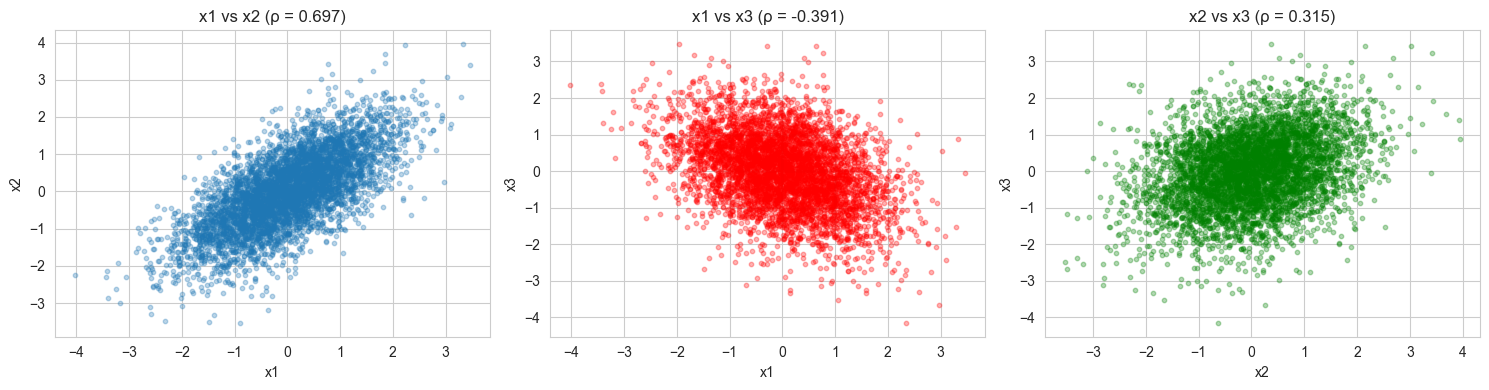

In [16]:
# Generate correlated continuous variables
sim2 = MixedSimulator(n=5000)
sim2.add_continuous("x1", mean=0, std=1)
sim2.add_continuous("x2", mean=0, std=1)
sim2.add_continuous("x3", mean=0, std=1)

sim2.set_correlation("x1", "x2", 0.7)
sim2.set_correlation("x1", "x3", -0.4)
sim2.set_correlation("x2", "x3", 0.3)

data2 = sim2.generate(seed=607)

# Compare specified vs. observed correlations
print("Specified correlations:")
print("  x1 ↔ x2:  0.7")
print("  x1 ↔ x3: -0.4")
print("  x2 ↔ x3:  0.3")
print("\nObserved correlations:")
print(data2[["x1", "x2", "x3"]].corr().round(3))

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(data2["x1"], data2["x2"], alpha=0.3, s=10)
axes[0].set_title(f"x1 vs x2 (ρ = {data2[['x1','x2']].corr().iloc[0,1]:.3f})")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")

axes[1].scatter(data2["x1"], data2["x3"], alpha=0.3, s=10, color='red')
axes[1].set_title(f"x1 vs x3 (ρ = {data2[['x1','x3']].corr().iloc[0,1]:.3f})")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x3")

axes[2].scatter(data2["x2"], data2["x3"], alpha=0.3, s=10, color='green')
axes[2].set_title(f"x2 vs x3 (ρ = {data2[['x2','x3']].corr().iloc[0,1]:.3f})")
axes[2].set_xlabel("x2")
axes[2].set_ylabel("x3")

plt.tight_layout()
plt.savefig("../../final_project_submission/correlation_visualization.pdf", bbox_inches='tight')
plt.show()

## Example 4: Method Chaining

Build simulators using clean, fluent API.

Student data generated with method chaining:


,gpa,scholarship,year
0,2.833035,0,Sophomore
1,2.571235,1,Sophomore
2,2.598732,1,Senior
3,3.061500,1,Sophomore
4,3.477495,1,Freshman


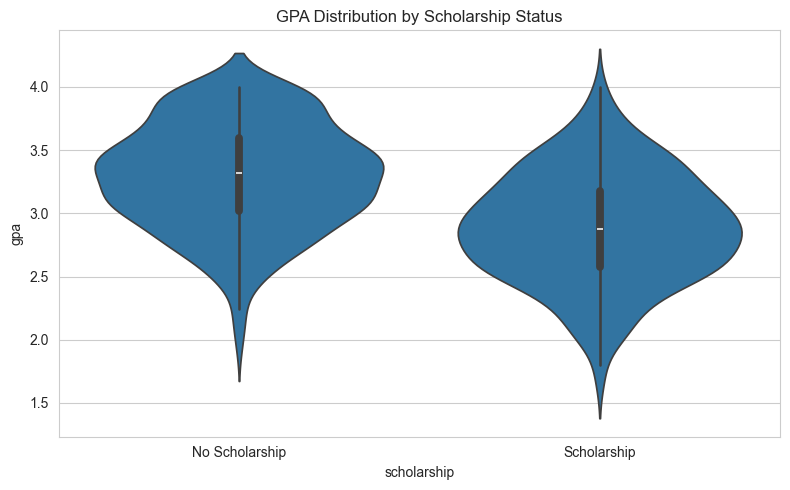

In [5]:
# Create entire simulation in one expression
student_data = (MixedSimulator(n=500)
                .add_continuous("gpa", mean=3.2, std=0.5, min_val=0, max_val=4)
                .add_binary("scholarship", prob=0.4)
                .add_ordinal("year", 
                            levels=["Freshman", "Sophomore", "Junior", "Senior"],
                            probs=[0.25, 0.25, 0.25, 0.25])
                .set_correlation("gpa", "scholarship", 0.6)
                .generate(seed=42))

print("Student data generated with method chaining:")
display(student_data.head())

# Visualize GPA by scholarship status
plt.figure(figsize=(8, 5))
sns.violinplot(data=student_data, x="scholarship", y="gpa")
plt.title("GPA Distribution by Scholarship Status")
plt.xticks([0, 1], ["No Scholarship", "Scholarship"])
plt.tight_layout()
plt.show()

For more information:
- **GitHub:** https://github.com/dmaduabum/causaldata